# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("../../api_keys/api_keys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
btc_price = btc_response_data['data']['1']['quotes']['USD']['price']
# print(btc_price)

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
eth_price = eth_response_data['data']['1027']['quotes']['USD']['price']
# print(eth_price)

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $74053.20
The current value of your 5.3 ETH is $23154.43


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-10-28", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker_data = alpaca_api.get_barset(
    tickers,
    timeframe,
    start=current_date,
    end=current_date,
    limit=1000
).df

# Preview DataFrame
ticker_data.head()

AGG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2021-10-28 00:00:00-04:00  114.71  114.825  114.57  114.65  4971007  455.46   

                                                            
                            high     low   close    volume  
time                                                        
2021-10-28 00:00:00-04:00  458.4  455.45  458.27  43081788

In [12]:
# Pick AGG and SPY close prices

agg_close_price = float(ticker_data['AGG']['close'])
spy_close_price = float(ticker_data['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.65
Current SPY closing price: $458.27


In [14]:
# Compute the current value of shares

my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $22930.00
The current value of your 50 SPY shares is $22913.50


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_shares_value = my_agg_value+my_spy_value
my_crypto_value = my_btc_value+my_eth_value


# Create savings DataFrame
savings_value = {   
    "amount":[my_shares_value,my_crypto_value],
    "shares": [my_shares_value],
    "crypto": [my_crypto_value]
}

df_savings = pd.DataFrame(savings_value, index=["shares", "crypto"], columns=["amount"])


# Display savings DataFrame
df_savings


,amount
shares,45843.500
crypto,97207.628


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

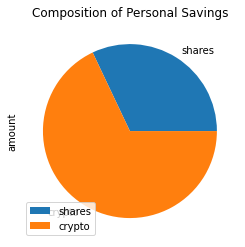

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [41]:
# Set ideal emergency fund
monthly_income = 12000
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations, you have enough money in your savings fund!")
elif total_savings == emergency_fund:
    print("Congratulations, you have reached your financial goal!")
elif total_savings < emergency_fund:
    print(f"You need to save an additional ${emergency_fund - total_savings:,.2f} in order to reach your goal.")
else:
    print("whoops, something went wrong")

Congratulations, you have enough money in your savings fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [42]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-28', tz='America/New_York').isoformat()

In [44]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_stock_data = alpaca_api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.500  2228734  258.46   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380  257.73   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306  257.73   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797  257.32   
2017-11-14 00:00:00-05:00  109.01  109.12  109.00  109.105  2663310  257.40   

                                                               
                               high     low   close    volume  
time                                                           
2017-11-08 00:00:00-05:00  259.2200  258.15  259.13  32174191  
2017-11-09 00:00:00-05:00  258.3900  256.36  258.20  75322217  
2017-11-10 00:00:00-05:00  258.2100  257.37  258.08  35755951  
2017-11-13 00:00:00-05:00  258.5900  257.27  258.34  31963013  
2017-11-14 00:00:00-05:00  258.3581  256.52  257.75  41935632

In [58]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

mc_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252 * 30,
    weights = [.4, .6]
)

In [59]:
# Printing the simulation input data
mc_portfolio.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.500  2228734   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797   
2017-11-14 00:00:00-05:00  109.01  109.12  109.00  109.105  2663310   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-11-08 00:00:00-05:00          NaN  258.46  259.2200  258.15  259.13   
2017-11-09 00:00:00-05:00    -0.000731  257.73  258.3900  256.36  258.20   
2017-11-10 00:00:00-05:00    -0.003976  257.73  258.2100  257.37  258.08   
2017-11-13 00:00:00-05:00    -0.000046  257.32  258.5900  257.27  258.34   
2017-11-14 00:00:00-05:00     0.001147  257.40  258.3581  256.52  257.75   

                                                  
                             volume daily_return  
time                                              
2017-11-08 00:00:00-05:00  32174191          NaN  
2017-11-09 00:00:00-05:00  75322217    -0.003589  
2017-11-10 00:00:00-05:00  35755951    -0.000465  
2017-11-13 00:00:00-05:00  31963013     0.001007  
2017-11-14 00:00:00-05:00  41935632    -0.002284

In [60]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brianwetzel/Bootcamp/Homework/HW4_Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005623,1.008263,1.005466,1.012122,1.003718,1.002222,1.017453,0.990992,1.002555,0.982024,...,1.004694,1.004848,1.000637,1.006390,0.987546,1.009172,1.008359,1.001359,0.992018,0.996946
2,1.009332,1.010359,1.007854,1.024811,0.991386,1.012296,1.023751,0.992128,0.999779,0.975192,...,1.004306,1.005807,1.000754,1.021123,0.988662,1.031466,1.009371,0.994734,0.991335,0.999328
3,0.985710,1.015015,1.010150,1.033467,0.994358,1.020303,1.026637,0.978557,0.992669,0.967159,...,1.012518,1.005519,0.986803,1.021172,0.983250,1.043064,1.007276,1.001218,0.984348,0.997405
4,0.982412,1.031599,1.013928,1.033868,0.983140,1.032693,1.031368,0.981549,0.983066,0.984658,...,1.023532,1.011917,0.981377,1.028491,0.974087,1.028992,1.011733,0.989737,0.998660,0.996158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,21.329590,26.950120,20.080041,13.582067,73.704670,52.064193,16.281373,51.965529,35.938952,23.958532,...,21.037004,24.274813,30.505596,20.639815,21.417709,36.446624,37.415111,19.387348,26.703313,7.722372
7557,21.205727,27.086041,19.788466,13.389695,73.613152,53.126143,16.243434,51.685809,35.809668,23.902050,...,21.282879,23.958106,30.525767,20.948781,21.229784,36.682613,37.786160,19.197756,27.097696,7.728944
7558,21.517448,27.183388,19.948023,13.202555,72.181224,53.421848,16.231577,51.839956,35.743735,24.068538,...,21.447863,24.325228,30.832163,20.820239,20.871370,37.012908,37.914117,19.298311,27.305733,7.710182
7559,21.522178,27.075849,19.572453,13.328845,71.972359,53.705345,16.218868,51.874372,36.136616,24.156984,...,21.367708,24.545212,31.195599,20.841022,20.896351,36.838669,37.868825,19.286701,27.245377,7.646844


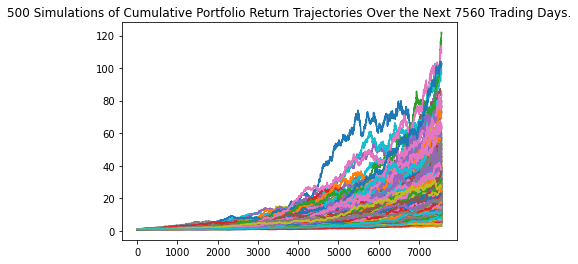

In [62]:
# Plot simulation outcomes
line_plot = mc_portfolio.plot_simulation() 

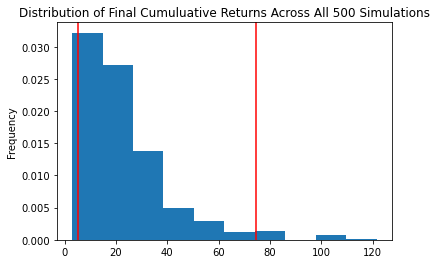

In [63]:
# Plot probability distribution and confidence intervals
dist_plot = mc_portfolio.plot_distribution()

### Retirement Analysis

In [64]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = mc_portfolio.summarize_cumulative_return()

# Print summary statistics
print(summary_stats) 

count           500.000000
mean             22.920060
std              17.387691
min               2.896872
25%              11.350310
50%              18.127707
75%              29.105040
max             121.508783
95% CI Lower      5.158765
95% CI Upper     74.427427
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [65]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $103175.3 and $1488548.55


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [66]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $154762.95 and $2232822.82


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [67]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [68]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [69]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [70]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [71]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


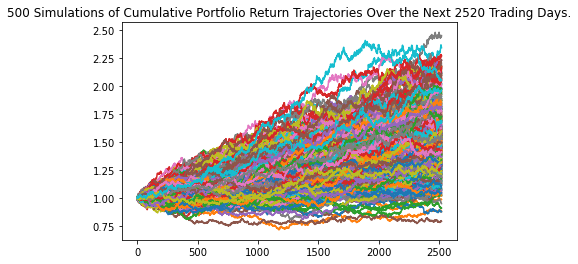

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

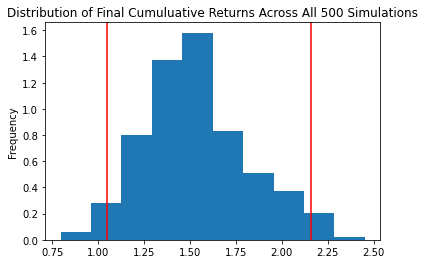

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
